### Name of the Student: Nicholas Furi

### Predict winner soccer games: EDA 

### - In the following notebook EDA is conducted

In [133]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
pd.set_option('display.max_columns', None)


In [133]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
pd.set_option('display.max_columns', None)


### The csv file that are being read are the one created after conducting the twitter scrape.


In [2]:
# Reading the DataFrame with the added score of Polarity and Subjectivity

df_sa2223 = pd.read_csv("DataFrameTwitter/df_sa2223.csv")
df_sa2122 = pd.read_csv("DataFrameTwitter/df_sa2122.csv")
df_sa2021 = pd.read_csv("DataFrameTwitter/df_sa2021.csv")
df_sa1920 = pd.read_csv("DataFrameTwitter/df_sa1920.csv")
df_sa1819 = pd.read_csv("DataFrameTwitter/df_sa1819.csv")
df_sa1718 = pd.read_csv("DataFrameTwitter/df_sa1718.csv")
df_sa1617 = pd.read_csv("DataFrameTwitter/df_sa1617.csv")
df_sa1516 = pd.read_csv("DataFrameTwitter/df_sa1516.csv")

In [118]:
# Merge the DataFrame 

df = pd.concat([df_sa1516,df_sa1617,df_sa1718,df_sa1819,df_sa1920,df_sa2021,df_sa2122,df_sa2223], axis=0)


### Checking the merge dataframe

In [102]:
df.dtypes

Unnamed: 0              int64
Date                   object
Div                    object
Team                   object
TS                      int64
TST                     int64
TC                      int64
TF                      int64
TY                      int64
HR                      int64
Opponent               object
OS                      int64
OST                     int64
OC                      int64
OF                      int64
OY                      int64
OR                      int64
HTTG                  float64
HTOG                  float64
new_HTR                object
FTTG                    int64
FTOG                    int64
new_FTR                object
VCA                   float64
VCD                   float64
VCH                   float64
IWA                   float64
IWD                   float64
IWH                   float64
BWA                   float64
BWD                   float64
BWH                   float64
B365A                 float64
B365D     

In [103]:
df.shape

(5618, 46)

In [104]:
df.isnull().sum()

Unnamed: 0            0
Date                  0
Div                   0
Team                  0
TS                    0
TST                   0
TC                    0
TF                    0
TY                    0
HR                    0
Opponent              0
OS                    0
OST                   0
OC                    0
OF                    0
OY                    0
OR                    0
HTTG                  2
HTOG                  2
new_HTR               0
FTTG                  0
FTOG                  0
new_FTR               0
VCA                   4
VCD                   4
VCH                   4
IWA                   8
IWD                   8
IWH                   8
BWA                   4
BWD                   4
BWH                   4
B365A                 6
B365D                 6
B365H                 6
WHH                   4
WHD                   4
WHA                   4
Avg_Odds_Away         4
Avg_Odds_Draw         4
Avg_Odds_Home         4
Venue           

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5618 entries, 0 to 299
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5618 non-null   int64  
 1   Date                5618 non-null   object 
 2   Div                 5618 non-null   object 
 3   Team                5618 non-null   object 
 4   TS                  5618 non-null   int64  
 5   TST                 5618 non-null   int64  
 6   TC                  5618 non-null   int64  
 7   TF                  5618 non-null   int64  
 8   TY                  5618 non-null   int64  
 9   HR                  5618 non-null   int64  
 10  Opponent            5618 non-null   object 
 11  OS                  5618 non-null   int64  
 12  OST                 5618 non-null   int64  
 13  OC                  5618 non-null   int64  
 14  OF                  5618 non-null   int64  
 15  OY                  5618 non-null   int64  
 16  OR     

In [106]:
df.columns

Index(['Unnamed: 0', 'Date', 'Div', 'Team', 'TS', 'TST', 'TC', 'TF', 'TY',
       'HR', 'Opponent', 'OS', 'OST', 'OC', 'OF', 'OY', 'OR', 'HTTG', 'HTOG',
       'new_HTR', 'FTTG', 'FTOG', 'new_FTR', 'VCA', 'VCD', 'VCH', 'IWA', 'IWD',
       'IWH', 'BWA', 'BWD', 'BWH', 'B365A', 'B365D', 'B365H', 'WHH', 'WHD',
       'WHA', 'Avg_Odds_Away', 'Avg_Odds_Draw', 'Avg_Odds_Home', 'Venue',
       'newdate_-1', 'newdate_-2', 'polarity_score', 'subjectivity_score'],
      dtype='object')

#### Clean up DataFrame
 - 1.1 Drop Columns:
     - Unnamed: 0 , created after the merfe of the dataframes
     - Div, represent the division of the league which is always the same for the whole DataFrame
     - Betting odds that are are no more needed after calculating the averages.
         - VCA, VCD, VCH --> Bettings Odds of VC Bet bookmakers
         - IWA, IWD,IWH --> Bettings Odds of Interwetten
         - BWA, BWD, BWH --> Betting Odds of Bet&Win
         - B365A, B365D, B365H --> Betting Odds of Bet365
         - WHH, WHD,WHA --> Betting Odds of William Hill
    - Columns used for the twitter scrape:
        - newdate_-1
        - newdate_-2
- 1.2 Convert the Date columns from Object to datetime
- 1.3 Reset the Index
- 1.4 Drop Nan Values

In [107]:
df

,Unnamed: 0,Date,Div,Team,TS,TST,TC,TF,TY,HR,...,WHD,WHA,Avg_Odds_Away,Avg_Odds_Draw,Avg_Odds_Home,Venue,newdate_-1,newdate_-2,polarity_score,subjectivity_score
0,0,22.08.15,I1,Lazio,21,9,10,18,2,0,...,4.0,7.00,7.02,4.100,1.490,Home,21.08.15,20.08.15,0.800000,0.975610
1,1,22.08.15,I1,Bologna,9,4,3,8,1,0,...,4.0,7.00,7.02,4.100,1.490,Away,21.08.15,20.08.15,0.658824,0.989247
2,2,22.08.15,I1,Verona,12,7,3,9,2,0,...,3.5,1.73,1.72,3.610,5.100,Home,21.08.15,20.08.15,0.775000,0.989362
3,3,22.08.15,I1,Roma,21,8,7,11,1,0,...,3.5,1.73,1.72,3.610,5.100,Away,21.08.15,20.08.15,0.758621,0.983871
4,4,23.08.15,I1,Empoli,15,5,8,15,1,0,...,3.1,3.50,3.50,3.156,2.210,Home,22.08.15,21.08.15,0.777778,0.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,13.11.2022,I1,Spezia,16,9,10,21,4,0,...,3.4,3.40,3.47,3.376,2.090,Away,2022-11-12,2022-11-11,0.666667,0.978723
296,296,13.11.2022,I1,Milan,12,3,5,13,1,0,...,3.8,4.75,4.79,3.750,1.696,Home,2022-11-12,2022-11-11,0.750000,0.993333
297,297,13.11.2022,I1,Fiorentina,11,5,7,11,4,0,...,3.8,4.75,4.79,3.750,1.696,Away,2022-11-12,2022-11-11,0.756757,0.987500
298,298,13.11.2022,I1,Juventus,13,9,2,10,2,0,...,3.4,3.80,3.87,3.406,1.956,Home,2022-11-12,2022-11-11,0.714286,0.990000


In [119]:
# 1.1
df.drop(['Unnamed: 0','VCA', 'VCD', 'VCH', 'IWA', 'IWD',
       'IWH', 'BWA', 'BWD', 'BWH', 'B365A', 'B365D', 'B365H', 'WHH', 'WHD',
       'WHA','newdate_-1', 'newdate_-2'], axis=1, inplace=True)

# 1.2
df['Date'] = pd.to_datetime(df.Date,dayfirst=True)
# 1.3
df = df.reset_index(drop=True)
# 1.4
df1 = df.dropna()

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5607 entries, 0 to 5617
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5607 non-null   datetime64[ns]
 1   Div                 5607 non-null   object        
 2   Team                5607 non-null   object        
 3   TS                  5607 non-null   int64         
 4   TST                 5607 non-null   int64         
 5   TC                  5607 non-null   int64         
 6   TF                  5607 non-null   int64         
 7   TY                  5607 non-null   int64         
 8   HR                  5607 non-null   int64         
 9   Opponent            5607 non-null   object        
 10  OS                  5607 non-null   int64         
 11  OST                 5607 non-null   int64         
 12  OC                  5607 non-null   int64         
 13  OF                  5607 non-null   int64       

In [122]:
df1.describe()

,TS,TST,TC,TF,TY,HR,OS,OST,OC,OF,...,OR,HTTG,HTOG,FTTG,FTOG,Avg_Odds_Away,Avg_Odds_Draw,Avg_Odds_Home,polarity_score,subjectivity_score
count,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,...,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000
mean,11.990191,4.800785,5.127698,13.604245,2.302122,0.122525,11.993579,4.801141,5.128589,13.603710,...,0.122525,0.615302,0.615302,1.411272,1.411272,4.615074,4.029230,2.875746,0.726336,0.982644
std,5.210490,2.702930,2.924321,4.183851,1.361006,0.354580,5.210821,2.702560,2.924129,4.183608,...,0.354580,0.796801,0.796801,1.233352,1.233352,3.774127,1.080265,1.968317,0.095124,0.019209
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.170000,2.400000,1.048000,0.166667,0.500000
25%,8.000000,3.000000,3.000000,11.000000,1.000000,0.000000,8.000000,3.000000,3.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.195000,3.340000,1.619000,0.675000,0.981818
50%,11.000000,4.000000,5.000000,13.000000,2.000000,0.000000,11.000000,4.000000,5.000000,13.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,3.270000,3.630000,2.250000,0.733333,0.987805
75%,15.000000,6.000000,7.000000,16.000000,3.000000,0.000000,15.000000,6.000000,7.000000,16.000000,...,0.000000,1.000000,1.000000,2.000000,2.000000,5.545000,4.306000,3.340000,0.790698,0.991150
max,46.000000,18.000000,20.000000,32.000000,8.000000,2.000000,46.000000,18.000000,20.000000,32.000000,...,2.000000,5.000000,5.000000,7.000000,7.000000,35.800000,14.400000,17.900000,0.991632,0.997222


### Column Description:
- Date , is the day and year of when the game occurs
- Team, is the name of the team
- TS, the number of Shots for the team
- TST, number of Shots on Target for the team
- TC, number of cornes for the team
- TF, number of fouls committed
- TY, number of yellow cards for the Team
- HR, number of red card for the Team
- Opponent, the name of the team which the Team played against
- OS, number of Shots of the Opponent team
- OST, number of Shots on Target for the Opponent Team
- OC, number of corners gained from the Oppenent Team
- OF, number of fouls commetted by the Oppnent Team
- OY, number of yellow cards for the Opponent Team
- OR, number of red card for the Opponent Team
- HTTG, number of goals in the half time from the Team
- HTOG, number of goals in the half time from the Opponent
- new_HTR, is the results in half time which can be Win, Lose or Drow and referes to the Team
- FTTG, number of goals in the full time from the Team
- FTOG, number of goals in the full time from the Opponent team
- new_FTR, is the results in full time which can be Win, Lose or Drow and referes to the Team
- Avg_Odds_Away, average of the betting sites for the Away odds
- Avg_Odds_Draw, average of the betting sites for the draw odd
- Avg_Odds_Home, average of the betting sites for the home odds
- Venue, if the team is playing at home or Away
- polarity_score, represents the emotion in a text
- subjectivity_score, someone's beliefs feeling or opitions

## EDA

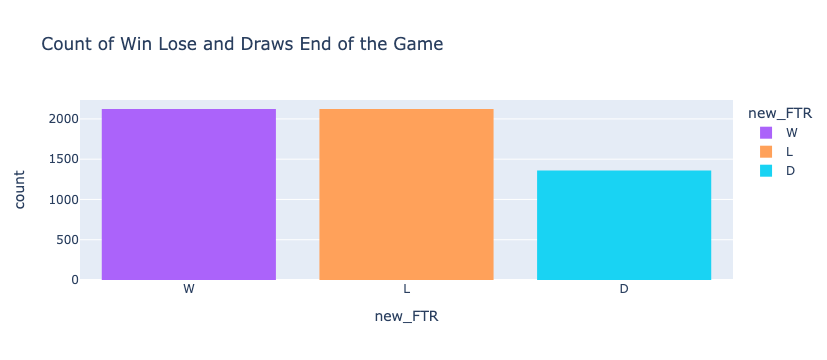

W    37.863385
L    37.863385
D    24.273230
Name: new_FTR, dtype: float64

In [179]:
#Check the distribution of the results a the end of the game

import plotly.express as px

fig = px.histogram(df1, x="new_FTR", title='Count of Win Lose and Draws End of the Game', color="new_FTR",
                  color_discrete_map = {0:'red',1:'blue',2:'purple'})
fig.show()

# Percentage of Win Loses and Draws

(df1['new_FTR'].value_counts()/df1['new_FTR'].count())*100

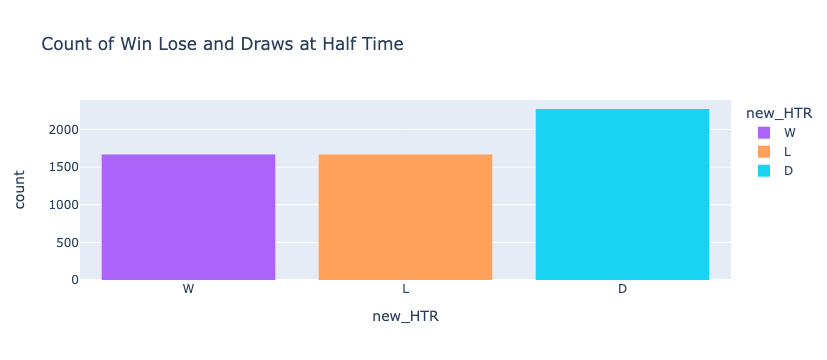

In [178]:
#Check the distribution of the results a the hald of the game

fig = px.histogram(df1, x="new_HTR", title='Count of Win Lose and Draws at Half Time', color="new_HTR",
                  color_discrete_map = {0:'red',1:'blue',2:'purple'})
fig.show()

### Considerations from the charts above:
- the number of wins and defeats in the data are the most frequent results at the end of the game
- In order to predict the winner of each game, the dependent variable could be split into a binary way. With 1 as the winning and 0 as the defeats and draws.
- In the second chart, the distribution of the results at half time of the game the draws higher then winning and defeats. The meaning of this chart is that most of the games in half time are more stable.

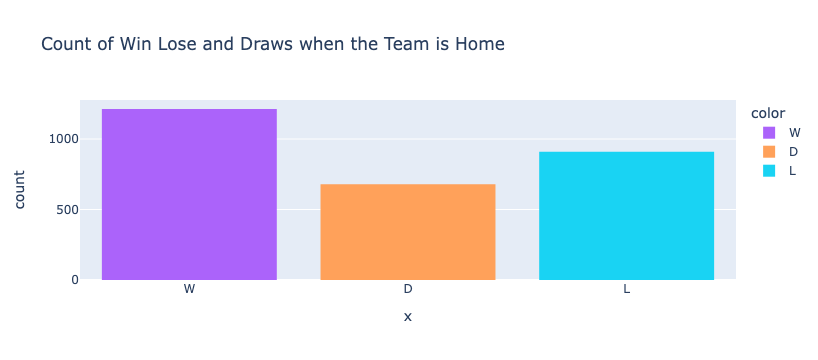

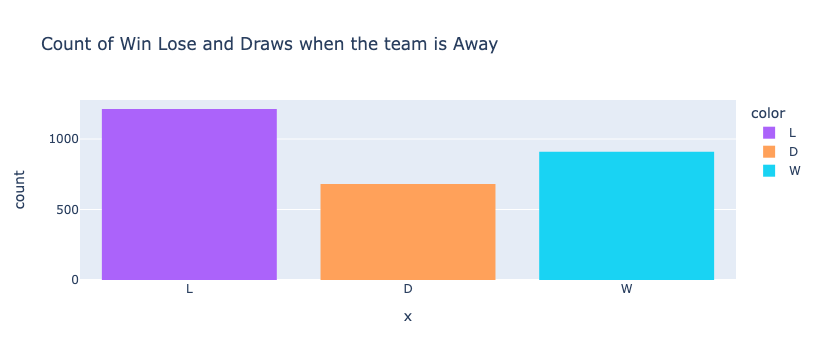

In [158]:
# Distribution of win/lose/draws if the team is playing at Home
fig = px.histogram(df1,
                   x= df1.loc[df["Venue"] == "Home"]["new_FTR"],
                   title='Count of Win Lose and Draws when the Team is Home',
                  color =df1.loc[df["Venue"] == "Home"]["new_FTR"],
                  color_discrete_map = {0:'yellow',1:'brown',2:'green'})
fig.show()

# Distribution of win/lose/draws if the team is playing Away
fig = px.histogram(df1,
                   x= df1.loc[df["Venue"] == "Away"]["new_FTR"], 
                   title='Count of Win Lose and Draws when the team is Away',
                   color = df1.loc[df["Venue"] == "Away"]["new_FTR"],
                   color_discrete_map = {0:'yellow',1:'brown',2:'green'})
fig.show()

### Considerations from the charts above:
In the charts there is an analysis of how the teams perform when the play at Home or Away
 - Team that play at home, tend to win more of their games
 - Team that play away, tend to lose more of their games
 - Playing at home is more benificial for the team

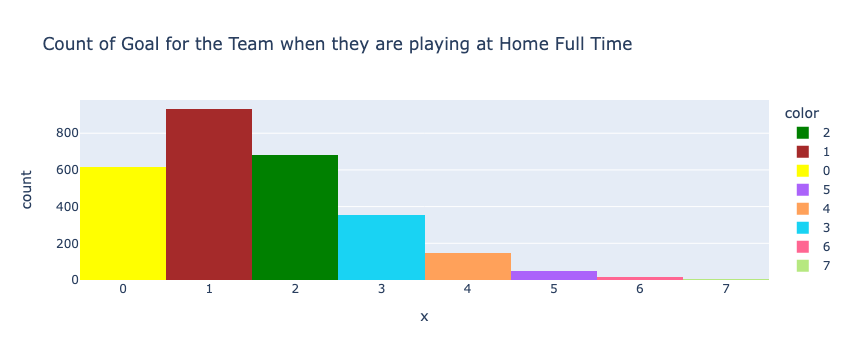

In [134]:
#Checking the distribution of goal for the team when they play Home Full Time

fig = px.histogram(df1,
                   x= df1.loc[df["Venue"] == "Home"]["FTTG"], 
                   title='Count of Goal for the Team when they are playing at Home Full Time',
                   color = df1.loc[df["Venue"] == "Home"]["FTTG"],
                   color_discrete_map = {0:'yellow',1:'brown',2:'green'})
fig.show()

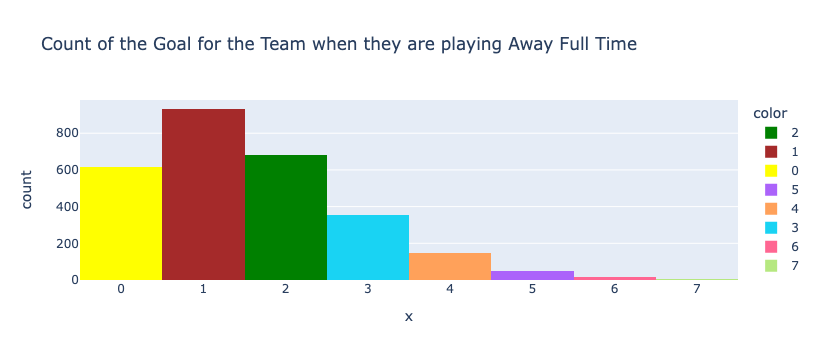

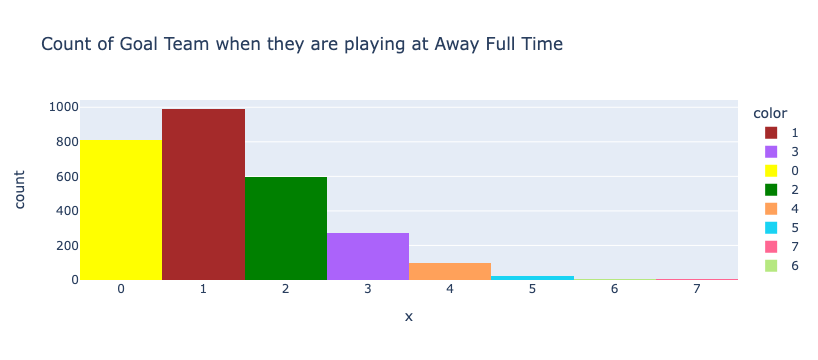

In [161]:
#Checking the distribution of goal for the team when they play Away Full Time

fig = px.histogram(df1,
                   x= df1.loc[df["Venue"] == "Home"]["FTTG"], 
                   title='Count of the Goal for the Team when they are playing Away Full Time',
                   color = df1.loc[df["Venue"] == "Home"]["FTTG"],
                   color_discrete_map = {0:'yellow',1:'brown',2:'green'})
fig.show()


#Checking the distribution of goal for the team when they play Away Half Time
fig = px.histogram(df1,
                   x= df1.loc[df["Venue"] == "Away"]["FTTG"], 
                   title='Count of Goal Team when they are playing at Away Full Time',
                   color = df1.loc[df["Venue"] == "Away"]["FTTG"],
                   color_discrete_map = {0:'yellow',1:'brown',2:'green'})
fig.show()


### Consideration from the charts above:
- Check the distribution of goal from the teams when they play at home and away:
    - Both charts have a skewness distribution
    - When the team play at home score more goals. The numbers of 0 goals differ from playing at home and away of about 200.
    - Playing at away, usually the team tends to score at least 1 goal
    - Playing home there are higher numbers for goals for 2,3,4,5,6,7 goals
    - This chart conferms the statments of the charts before that playing at home teams tend to perform better

In [162]:
# Sort the Team by Polarity_score
df2 = df1.groupby('Team')['polarity_score'].mean().reset_index()
df2.sort_values(by=['polarity_score'])
sort = df2.sort_values(['polarity_score'], ascending=False)
sort.head(10)

,Team,polarity_score
14,Juventus,0.801159
17,Milan,0.783916
32,Verona,0.758714
25,Sampdoria,0.753497
12,Genoa,0.743225
0,Atalanta,0.743095
10,Fiorentina,0.740658
3,Brescia,0.737998
13,Inter,0.735318
19,Napoli,0.732634


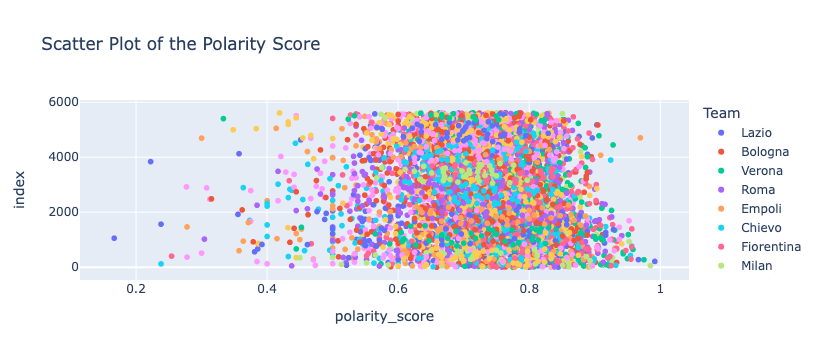

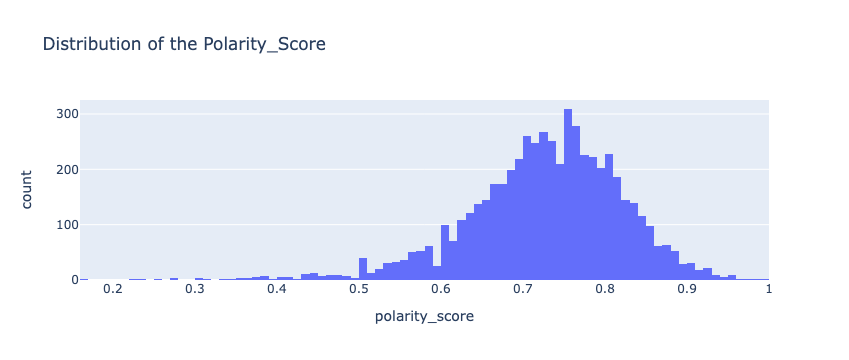

In [140]:
# Scatter Plot of the Polarity Score

fig = px.scatter(df1,
                 x = "polarity_score",                 
                 color = "Team",
                 title="Scatter Plot of the Polarity Score",
                )
fig.show()

# Histogram of the Polarity Score

fig = px.histogram(df1, x="polarity_score", title='Distribution of the Polarity_Score')
fig.show()

### Consideration from the charts above:
- Analysis of the polarity score:
    - The teams that have a higher polarity score are:
        - Juventus
        - Milan
        - Verona
        - Sampdoria
    - From the scatter plot, the distribution of the polarity score tends to have a higher density between 0.5 and 0.9
    - From the histogram the distribuition is skewed with a mean around 0.75


In [141]:
# Sort the Team by Subjectivity_score
df3 = df1.groupby('Team')['subjectivity_score'].mean().reset_index()
df3.sort_values(by=['subjectivity_score'])
sort2 = df3.sort_values(['subjectivity_score'], ascending=False)
sort2

,Team,subjectivity_score
16,Lecce,0.994831
21,Parma,0.992674
17,Milan,0.992304
18,Monza,0.992272
2,Bologna,0.992181
32,Verona,0.991643
14,Juventus,0.990709
12,Genoa,0.990089
13,Inter,0.988374
19,Napoli,0.988096


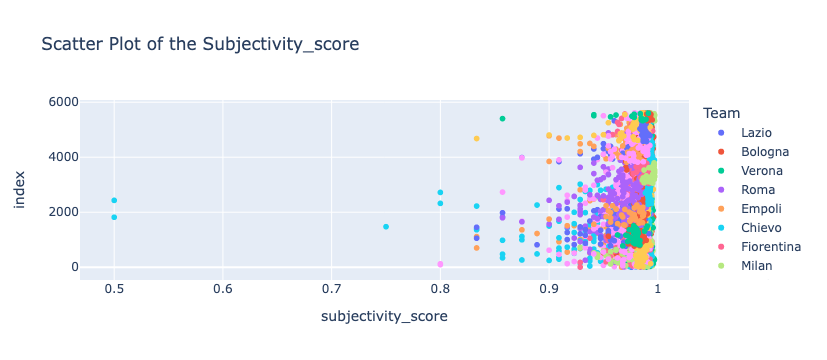

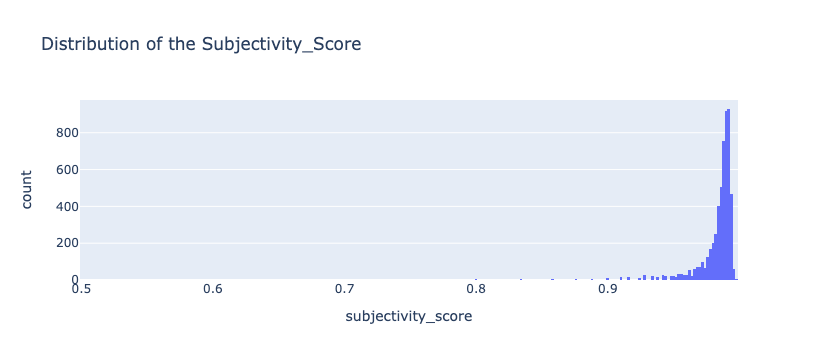

In [156]:
# Scatter Plot of the Subjectivity Score
fig = px.scatter(df1,
                 x = "subjectivity_score",                 
                 color = "Team",
                 title="Scatter Plot of the Subjectivity_score",
                )
fig.show()

# Histogram of the Subjectivity Score

fig = px.histogram(df1, x="subjectivity_score", title='Distribution of the Subjectivity_Score')
fig.show()

### Consideration from the charts above:
- Analysis of the Subjectivity score:
    - The teams that have a higher polarity score are:
        - Lecce
        - Parma
        - Milan
        - Monza
    - From the scatter plot, the distribution of the subjectivity score tends to have a higher density between 0.97 and 0.99
    - From the histogram the distribuition is skewed with a mean around 0.99
    - This score in overall thenn to be above 0.9 in most of the games
    - Have to check how actually can impact in the models


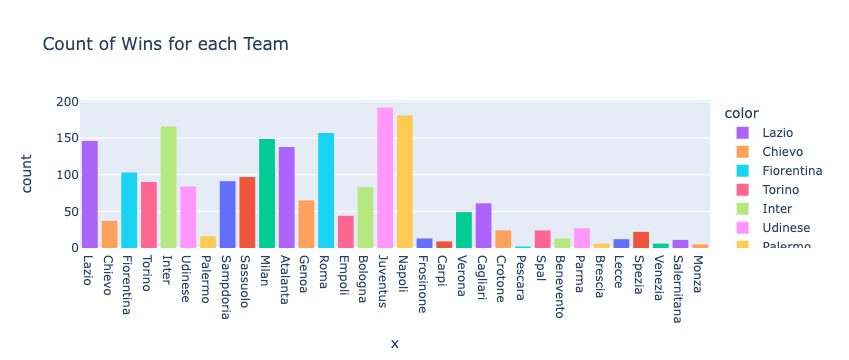

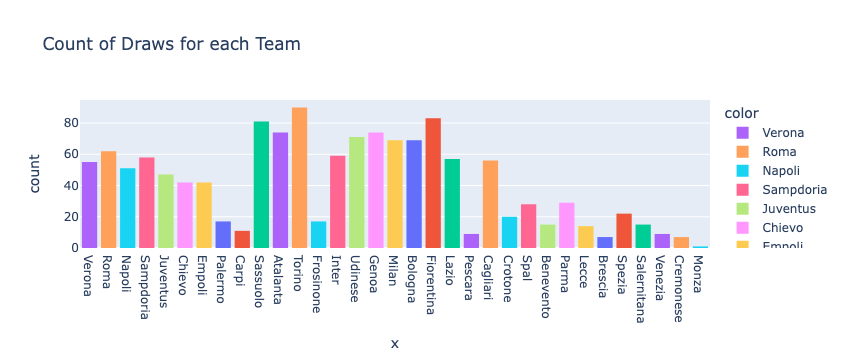

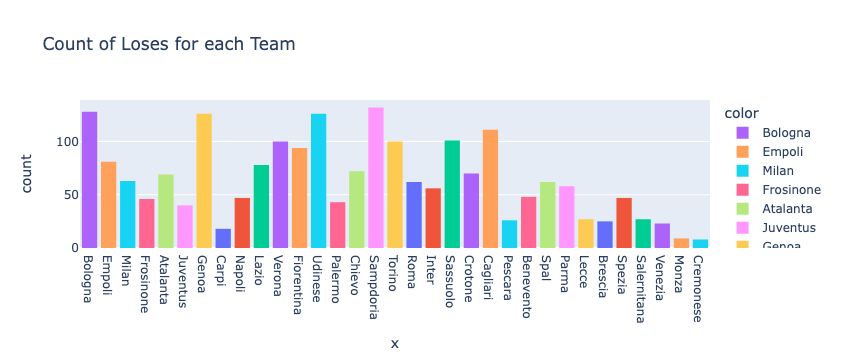

In [148]:
# Plotting the teams that had most victories
fig = px.histogram(df1,
                   x= df1.loc[df["new_FTR"] == "W"]["Team"], 
                   title='Count of Wins for each Team',
                   color = df1.loc[df["new_FTR"] == "W"]["Team"],
                   color_discrete_map = {0:'yellow',1:'brown',2:'green'})
fig.show()

## Plotting the teams that had most draws
fig = px.histogram(df1,
                   x= df1.loc[df["new_FTR"] == "D"]["Team"], 
                   title='Count of Draws for each Team',
                   color = df1.loc[df["new_FTR"] == "D"]["Team"],
                   color_discrete_map = {0:'yellow',1:'brown',2:'green'})
fig.show()

# Plotting the teams that had the most loses

fig = px.histogram(df1,
                   x= df1.loc[df["new_FTR"] == "L"]["Team"], 
                   title='Count of Loses for each Team',
                   color = df1.loc[df["new_FTR"] == "L"]["Team"],
                   color_discrete_map = {0:'yellow',1:'brown',2:'green'})
fig.show()

### Consideration from the charts above:
- From the total wins for team, the highest winnin team ar Juventus and Napoli. The models might reconize this team as a winning team and increase the prediction of the winning team.
- Teams that have higher draws are Torino and Fiorentina. This team might have a negative coefficients in predicting winning team in a game
- Teams that have higher defeats are Sampdoria and Bologna. This team might have a negative coefficients in predicting winning team in a game

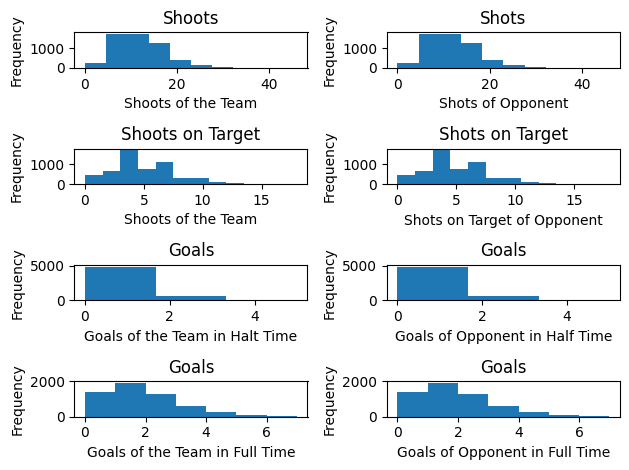

In [155]:
# Have done this 8 plots because the data of the Team and of the Opponent is the same since is repeted each game twice
# The key is the look at the data with the Venue 'Home' or 'Away'

import matplotlib.pyplot as plt

plt.subplots(4, 2)  # one row, two columns

plt.subplot(4, 2, 1)  # in my 1x2 grid of plots, what's in slot 1?
plt.hist(df1['TS'],bins=10)
plt.xlabel('Shoots of the Team')
plt.ylabel('Frequency')
plt.title('Shoots')

plt.subplot(4, 2, 2)  # in my 1x2 grid of plots, what's in slot 2?
plt.hist(df1['OS'], bins=10)
plt.xlabel('Shots of Opponent')
plt.ylabel('Frequency')
plt.title('Shots')

plt.subplot(4, 2, 3)  # in my 1x2 grid of plots, what's in slot 1?
plt.hist(df1['TST'],bins=12)
plt.xlabel('Shoots of the Team')
plt.ylabel('Frequency')
plt.title('Shoots on Target')

plt.subplot(4, 2, 4)  # in my 1x2 grid of plots, what's in slot 2?
plt.hist(df1['OST'], bins=12)
plt.xlabel('Shots on Target of Opponent')
plt.ylabel('Frequency')
plt.title('Shots on Target')

plt.subplot(4, 2, 5)  # in my 1x2 grid of plots, what's in slot 1?
plt.hist(df1['HTTG'], bins=3)
plt.xlabel('Goals of the Team in Halt Time')
plt.ylabel('Frequency')
plt.title('Goals')

plt.subplot(4, 2, 6)  # in my 1x2 grid of plots, what's in slot 2?
plt.hist(df1['HTOG'], bins=3)
plt.xlabel('Goals of Opponent in Half Time')
plt.ylabel('Frequency')
plt.title('Goals')

plt.subplot(4, 2, 7)  # in my 1x2 grid of plots, what's in slot 1?
plt.hist(df1['FTTG'], bins=7)
plt.xlabel('Goals of the Team in Full Time')
plt.ylabel('Frequency')
plt.title('Goals')

plt.subplot(4, 2, 8)  # in my 1x2 grid of plots, what's in slot 2?
plt.hist(df1['FTOG'], bins=7)
plt.xlabel('Goals of Opponent in Full Time')
plt.ylabel('Frequency')
plt.title('Goals')

# comment out the following line and run cell to see the difference it makes
plt.tight_layout()  # makes sure there is no overlap in plots

plt.show()

### Consideration from the charts above:
- Once each row of the dataframe was doubled and change the location of the teams and stats, the distributions of the soccers stats are the same for both Team and Opponents columns.
- This is something to take into cosideration when conducting analysis